# Lightcurve (+ Transit) Creation


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LightCurve(object):

    def __init__(self, numticks = 100, depth = 0, duration = 0):
        self.length = numticks
        if depth == 0:
            self.depth = np.random.uniform(.01,.20)
        else:
            self.depth = depth
        if duration == 0:
            self.duration = np.random.randint(.01 * self.length, .15 * self.length)
        else:
            self.duration = duration * self.length
        
        self.location = np.random.randint(0,self.length)
        self.flux = np.ones(self.length) + np.random.normal(loc = 0, scale = 0.001, size = self.length)
    
    def add_transit(self):
        lowerbound = int(self.location - self.duration/2)
        upperbound = int(self.location + self.duration/2)
        if lowerbound < 0:
            ub = self.length - lowerbound
            lb = upperbound
            self.flux[0:lb] -= self.depth
            self.flux[ub:self.length] -= self.depth
            overflow_flag = True
        if upperbound > self.length:
            lb = int(upperbound - self.length)
            ub = int(lowerbound)
            self.flux[0:lb] -= self.depth
            self.flux[ub:self.length] -= self.depth
            overflow_flag = True
        else:
            ub = int(upperbound)
            lb = int(lowerbound) 
            self.flux[lb:ub] -= self.depth
            overflow_flag = False
        if overflow_flag == True:
            plt.figure()
            plt.plot(np.arange(0,self.length)/self.length,self.flux, label = "Lightcurve", color = "deepskyblue")
            plt.plot(np.arange(0,lb+1)/self.length,self.flux[0:lb+1], label = "Transit", color = "navy")
            plt.plot(np.arange(ub-1,self.length)/self.length, self.flux[ub-1:self.length], color = "navy")
            plt.xlabel("Period")
            plt.ylabel("Normalized Flux")
            plt.title("Generated Light Curve")
            plt.legend()            
        else:
            plt.figure()
            plt.plot(np.arange(0,self.length)/self.length,self.flux, label = "Lightcurve", color = "deepskyblue")
            plt.plot(np.arange(lb-1,ub+1)/self.length,self.flux[lb-1:ub+1], label = "Transit", color = "navy")
            plt.xlabel("Period")
            plt.ylabel("Normalized Flux")
            plt.title("Generated Light Curve")
            plt.legend()


In [13]:
transit1 = LightCurve(numticks = 50, depth = .10, duration = .3)

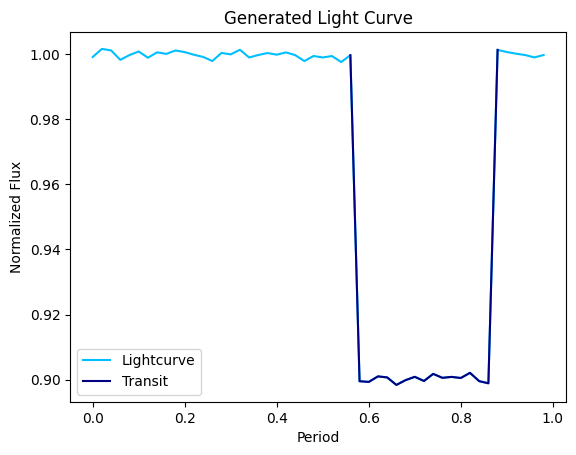

In [14]:
transit1.add_transit()